In [1]:
import pandas as pd
import numpy as np

# Generate artificial dataset
np.random.seed(42)

data = {
    "Document_ID": [f"DOC_{i}" for i in range(1, 201)],
    "Design_Input": np.random.choice(
        ["Valid", "Invalid", np.nan], size=200, p=[0.6, 0.3, 0.1]
    ),
    "Risk_Assessment": np.random.choice(
        ["High", "Medium", "Low", np.nan], size=200, p=[0.3, 0.4, 0.2, 0.1]
    ),
    "Compliance_Score": np.random.uniform(40, 100, size=200).round(2),
    "Critical_Issues": np.random.choice([0, 1, 2, np.nan], size=200, p=[0.5, 0.3, 0.1, 0.1]),
    "Last_Reviewed": pd.date_range(start="2023-01-01", periods=200, freq="D"),
}

df = pd.DataFrame(data)

# Randomly introduce null values for Compliance_Score
df.loc[np.random.choice(df.index, size=20, replace=False), "Compliance_Score"] = np.nan

print("Sample Dataset:")
print(df.head())

# Save the dataset
df.to_csv("enhanced_regulatory_dataset.csv", index=False)

Sample Dataset:
  Document_ID Design_Input Risk_Assessment  Compliance_Score  Critical_Issues  \
0       DOC_1        Valid          Medium             46.19              0.0   
1       DOC_2          nan            High             94.15              0.0   
2       DOC_3      Invalid            High             70.32              0.0   
3       DOC_4        Valid             Low             89.59              0.0   
4       DOC_5        Valid          Medium             59.20              0.0   

  Last_Reviewed  
0    2023-01-01  
1    2023-01-02  
2    2023-01-03  
3    2023-01-04  
4    2023-01-05  


Preprocessing

In [2]:
# Load dataset
df = pd.read_csv("enhanced_regulatory_dataset.csv")

# Fill missing values
df["Design_Input"] = df["Design_Input"].fillna("Unknown")
df["Risk_Assessment"] = df["Risk_Assessment"].fillna("Unknown")
df["Compliance_Score"] = df["Compliance_Score"].fillna(df["Compliance_Score"].mean())
df["Critical_Issues"] = df["Critical_Issues"].fillna(0)

# Feature engineering: Risk category weights
risk_weights = {"High": 3, "Medium": 2, "Low": 1, "Unknown": 0}
df["Risk_Weight"] = df["Risk_Assessment"].map(risk_weights)

# Composite Compliance Score
df["Composite_Score"] = (
    df["Compliance_Score"] - (df["Critical_Issues"] * 10) - (df["Risk_Weight"] * 5)
)

print("Enhanced Dataset with Composite Score:")
print(df.head())

Enhanced Dataset with Composite Score:
  Document_ID Design_Input Risk_Assessment  Compliance_Score  Critical_Issues  \
0       DOC_1        Valid          Medium             46.19              0.0   
1       DOC_2      Unknown            High             94.15              0.0   
2       DOC_3      Invalid            High             70.32              0.0   
3       DOC_4        Valid             Low             89.59              0.0   
4       DOC_5        Valid          Medium             59.20              0.0   

  Last_Reviewed  Risk_Weight  Composite_Score  
0    2023-01-01            2            36.19  
1    2023-01-02            3            79.15  
2    2023-01-03            3            55.32  
3    2023-01-04            1            84.59  
4    2023-01-05            2            49.20  


Compliance Analysis

In [3]:
# Compliance rules based on composite score
def compliance_status(row):
    if row["Composite_Score"] >= 70 and row["Design_Input"] == "Valid":
        return "Compliant"
    elif row["Composite_Score"] >= 50:
        return "Partially Compliant"
    else:
        return "Non-Compliant"

df["Compliance_Status"] = df.apply(compliance_status, axis=1)

# Summarize compliance status
compliance_summary = df["Compliance_Status"].value_counts()
print("Compliance Summary:")
print(compliance_summary)

Compliance Summary:
Compliance_Status
Partially Compliant    88
Non-Compliant          76
Compliant              36
Name: count, dtype: int64


Root Cause Analysis

In [4]:
# Root cause analysis
non_compliant = df[df["Compliance_Status"] == "Non-Compliant"]
root_causes = non_compliant.groupby(["Design_Input", "Risk_Assessment"]).size()

print("Root Causes of Non-Compliance:")
print(root_causes)

Root Causes of Non-Compliance:
Design_Input  Risk_Assessment
Invalid       High                4
              Low                11
              Medium              9
Unknown       High                2
              Medium              2
Valid         High               21
              Low                 6
              Medium             16
              Unknown             5
dtype: int64


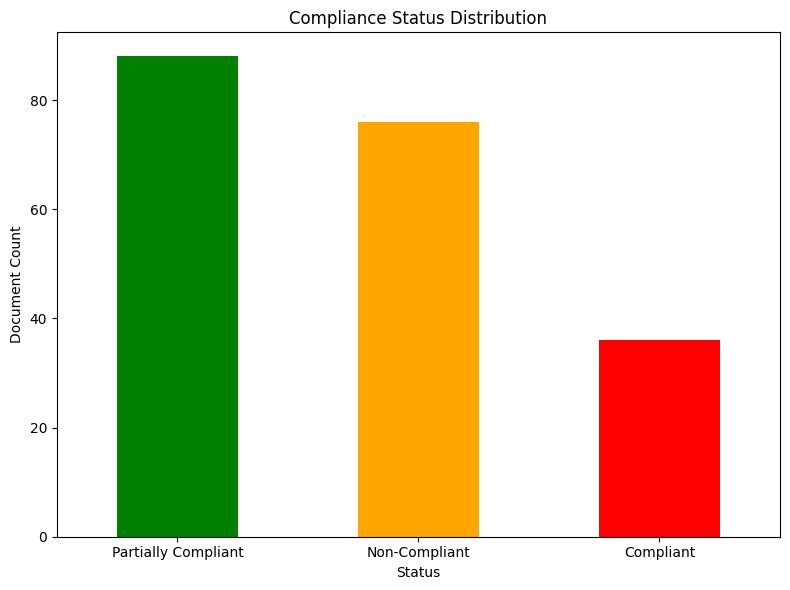

<Figure size 1000x600 with 0 Axes>

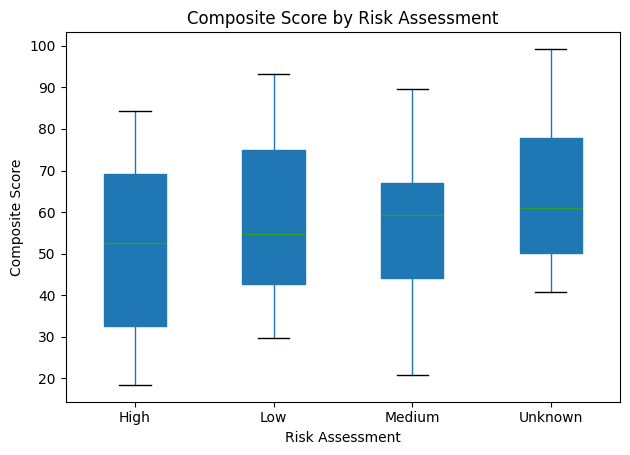

In [5]:
import matplotlib.pyplot as plt

# Compliance status distribution
plt.figure(figsize=(8, 6))
df["Compliance_Status"].value_counts().plot(kind="bar", color=["green", "orange", "red"])
plt.title("Compliance Status Distribution")
plt.xlabel("Status")
plt.ylabel("Document Count")
plt.xticks(rotation=0)
plt.tight_layout()
plt.savefig("compliance_status.png")
plt.show()

# Risk Assessment impact
plt.figure(figsize=(10, 6))
df.boxplot(column="Composite_Score", by="Risk_Assessment", grid=False, patch_artist=True)
plt.title("Composite Score by Risk Assessment")
plt.suptitle("")  # Suppress the automatic title
plt.xlabel("Risk Assessment")
plt.ylabel("Composite Score")
plt.tight_layout()
plt.savefig("risk_assessment_impact.png")
plt.show()

In [6]:
# Save full dataset with insights
df.to_csv("final_compliance_report.csv", index=False)

# Save non-compliant documents
non_compliant.to_csv("non_compliant_docs.csv", index=False)

print("Reports generated successfully.")

Reports generated successfully.


Files saved successfully!


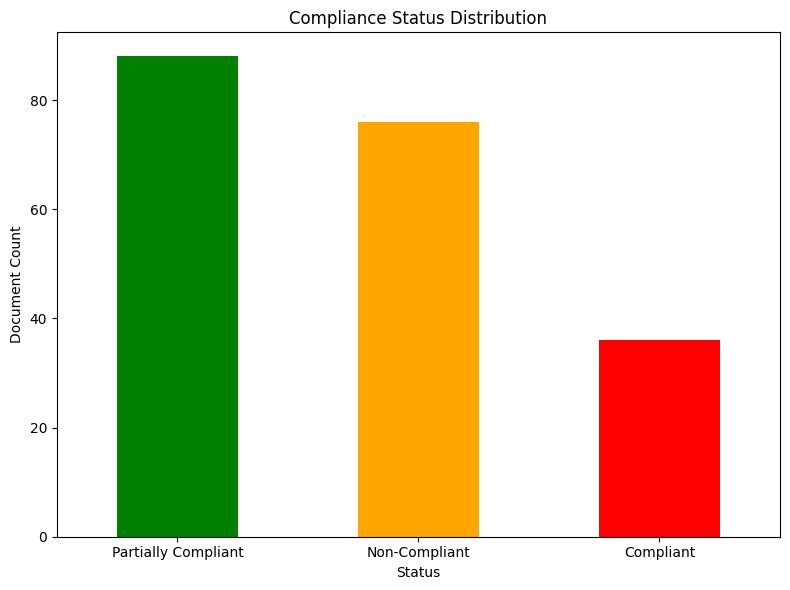

<Figure size 1000x600 with 0 Axes>

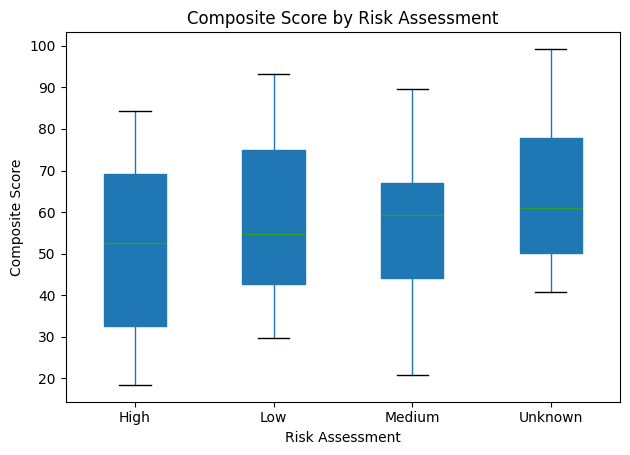

In [7]:
# Save all generated files
# Save the final compliance report
df.to_csv("final_compliance_report.csv", index=False)

# Save non-compliant documents
non_compliant.to_csv("non_compliant_docs.csv", index=False)

# Save visualizations
plt.figure(figsize=(8, 6))
df["Compliance_Status"].value_counts().plot(kind="bar", color=["green", "orange", "red"])
plt.title("Compliance Status Distribution")
plt.xlabel("Status")
plt.ylabel("Document Count")
plt.xticks(rotation=0)
plt.tight_layout()
plt.savefig("compliance_status.png")

plt.figure(figsize=(10, 6))
df.boxplot(column="Composite_Score", by="Risk_Assessment", grid=False, patch_artist=True)
plt.title("Composite Score by Risk Assessment")
plt.suptitle("")  # Suppress the automatic title
plt.xlabel("Risk Assessment")
plt.ylabel("Composite Score")
plt.tight_layout()
plt.savefig("risk_assessment_impact.png")

print("Files saved successfully!")